In [15]:
%pip install pycaret

Note: you may need to restart the kernel to use updated packages.


In [1]:
from pycaret.classification import *
from pycaret.regression import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pm_data = pd.read_csv("clean_data\\cleaned_data.csv")
pm_data["timestamp"] = pd.to_datetime(pm_data["timestamp"])
print(pm_data)

               timestamp   humidity     pm_2_5  temperature
0    2024-11-19 23:00:00  99.688333  23.166667    28.658334
1    2024-11-20 00:00:00  99.703334  25.500000    28.520000
2    2024-11-20 01:00:00  99.798335  24.866667    28.443333
3    2024-11-20 02:00:00  99.900002  16.883333    28.346666
4    2024-11-20 03:00:00  99.875002   9.766667    28.126666
...                  ...        ...        ...          ...
1995 2025-02-11 08:00:00  99.900002  32.583333    24.108333
1996 2025-02-11 09:00:00  99.900002  39.872727    25.109091
1997 2025-02-11 10:00:00  99.832760  22.327586    26.774138
1998 2025-02-11 11:00:00  96.426316  21.912281    28.028070
1999 2025-02-11 11:15:57  94.192308  21.571429    28.792857

[2000 rows x 4 columns]


In [3]:
s = setup(pm_data, target = 'pm_2_5', session_id = 123,date_features=["timestamp"],normalize=True)

,Description,Value
0,Session id,123
1,Target,pm_2_5
2,Target type,Regression
3,Original data shape,"(2000, 4)"
4,Transformed data shape,"(2000, 6)"
5,Transformed train set shape,"(1400, 6)"
6,Transformed test set shape,"(600, 6)"
7,Numeric features,2
8,Date features,1
9,Preprocess,True


In [4]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,4.7503,60.5331,7.4657,0.6949,0.4012,0.4343,0.0930
rf,Random Forest Regressor,4.2900,61.0475,7.5755,0.6780,0.3936,0.4022,0.1240
gbr,Gradient Boosting Regressor,5.5429,69.4953,8.1247,0.6344,0.4731,0.5990,0.0710
et,Extra Trees Regressor,4.4466,76.7374,8.3987,0.5908,0.4224,0.4021,0.1030
dt,Decision Tree Regressor,4.8494,82.3268,8.8115,0.5636,0.4664,0.4178,0.0290
knn,K Neighbors Regressor,6.0954,87.6415,9.1409,0.5387,0.4665,0.5334,0.0260
ada,AdaBoost Regressor,8.6227,125.2050,11.0632,0.3187,0.6923,1.1841,0.0490
ridge,Ridge Regression,8.8110,132.3221,11.3699,0.2822,0.6615,1.0229,0.0200
lar,Least Angle Regression,8.8112,132.3752,11.3714,0.2821,0.6595,1.0185,0.0230
lr,Linear Regression,8.8112,132.3752,11.3714,0.2821,0.6595,1.0185,0.8120


In [5]:
best_model = create_model('lightgbm')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,17:10:14
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,5.0123,50.9343,7.1368,0.6504,0.4359,0.4440
1,4.6085,44.4951,6.6705,0.7242,0.4375,0.4853
2,5.4226,183.1814,13.5345,0.4620,0.4614,0.5133
3,4.2688,33.7600,5.8103,0.7860,0.3266,0.3246
4,4.6009,39.5152,6.2861,0.7084,0.3815,0.3952
5,4.9326,77.1615,8.7842,0.6616,0.3616,0.3205
6,4.1353,31.7936,5.6386,0.7881,0.3335,0.3194
7,4.8866,44.2906,6.6551,0.7580,0.4454,0.5790
8,4.8539,45.5148,6.7465,0.7125,0.3840,0.3982


In [6]:
best_model_tune = tune_model(best_model)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,17:10:15
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,5.1554,52.8048,7.2667,0.6376,0.4506,0.4437
1,4.9796,54.2832,7.3677,0.6635,0.4691,0.5117
2,5.3827,179.4604,13.3963,0.4729,0.4767,0.5531
3,3.7863,27.1282,5.2085,0.8280,0.3012,0.2618
4,4.8480,64.6658,8.0415,0.5228,0.4120,0.3881
5,5.0037,62.4789,7.9044,0.7260,0.4123,0.3443
6,3.9806,32.6733,5.7161,0.7822,0.3160,0.2971
7,5.1365,55.2054,7.4300,0.6983,0.4742,0.6196
8,4.8473,53.7388,7.3307,0.6606,0.4180,0.4345


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [7]:
ensem_best_model = ensemble_model(best_model_tune, n_estimators = 50)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4.9084,48.1843,6.9415,0.6693,0.4271,0.4536
1,4.5086,43.2236,6.5745,0.7320,0.4329,0.4974
2,5.4714,179.7813,13.4083,0.4719,0.4583,0.5234
3,4.1944,32.0663,5.6627,0.7967,0.3210,0.3239
4,4.4991,37.3473,6.1112,0.7244,0.3742,0.3861
5,4.9136,77.6113,8.8097,0.6596,0.3598,0.3242
6,4.0319,30.4417,5.5174,0.7971,0.3261,0.3120
7,5.0719,47.6201,6.9007,0.7398,0.4596,0.6105
8,4.7320,44.5754,6.6765,0.7185,0.3779,0.3894


In [8]:
now = pd.Timestamp.now()
startdate = now.date()
enddate = startdate + pd.DateOffset(days=7)
next_week = pd.date_range(start=startdate, end=enddate, freq='D')

In [9]:
next_data = pd.DataFrame({'timestamp': next_week})
next_data['pm_2_5'] = pm_data['pm_2_5'].mean().round(2)
next_data['humidity'] = pm_data['humidity'].mean().round(2)
next_data['temperature'] = pm_data['temperature'].mean().round(2)


In [10]:
predict = predict_model(ensem_best_model, data=next_data)
data_plot = pd.DataFrame(predict, columns=['timestamp', 'prediction_label'])
data_plot["prediction_label"] = data_plot["prediction_label"].round(2)
data_plot

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,4.8480,28.0983,5.3008,0.0000,0.2119,0.2289


,timestamp,prediction_label
0,2025-03-17,22.49
1,2025-03-18,25.79
2,2025-03-19,27.14
3,2025-03-20,25.41
4,2025-03-21,24.90
5,2025-03-22,28.89
6,2025-03-23,29.24
7,2025-03-24,18.01


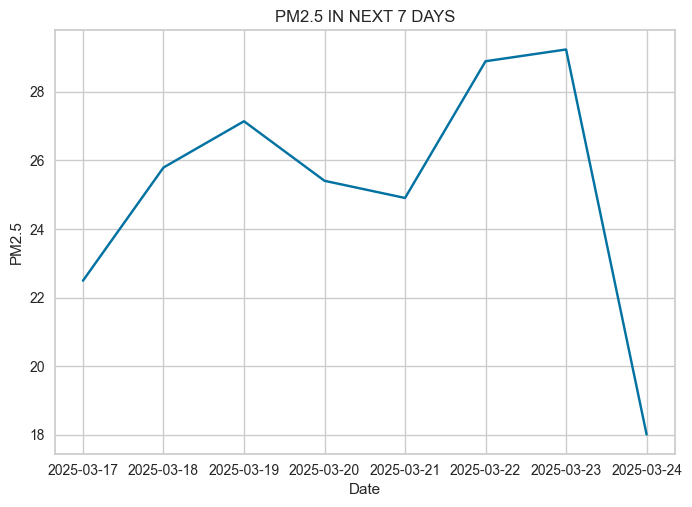

In [11]:
plt.plot(next_week, predict['prediction_label'])
plt.xlabel('Date')
plt.ylabel('PM2.5')
plt.title('PM2.5 IN NEXT 7 DAYS')
plt.grid(True)
plt.show()

In [12]:
save_model(ensem_best_model,'pm_2_5')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('date_feature_extractor',
                  TransformerWrapper(include=['timestamp'],
                                     transformer=ExtractDateTimeFeatures())),
                 ('numerical_imputer',
                  TransformerWrapper(include=['humidity', 'temperature'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('normalize', TransformerWrapper(transformer=StandardScaler())),
                 ('trained_model',
                  BaggingRegressor(estimator=LGBMRegressor(n_jobs=-1,
                                                           random_state=123),
                                   n_estimators=50, random_state=123))]),
 'pm_2_5.pkl')

In [13]:
#ตรวจความแม่นยำของ model
from pycaret.regression import *

model = load_model('pm_2_5')

predictions = predict_model(model)

print(predictions)

Transformation Pipeline and Model Successfully Loaded


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,4.5175,39.6514,6.2969,0.7465,0.3680,0.4022


               timestamp   humidity  temperature     pm_2_5  prediction_label
1342 2025-01-15 02:00:00  99.883339    25.891666  47.000000         40.825185
1338 2025-01-14 22:00:00  99.900002    26.295000  42.283333         41.026384
189  2024-11-28 00:00:00  99.900002    23.920000   8.866667          5.131548
1332 2025-01-14 16:00:00  97.698334    27.083334  42.016666         44.803184
1816 2025-02-03 20:00:00  99.856667    26.381666  26.916666         28.120204
...                  ...        ...          ...        ...               ...
457  2024-12-09 04:00:00  99.900002    26.993334  12.783334         12.100008
1126 2025-01-06 01:00:00  99.900002    26.606384  44.489361         36.526734
820  2024-12-24 07:00:00  99.900002    24.313559  33.750000         32.421665
1552 2025-01-23 20:00:00  99.900002    26.793221  40.466667         40.406300
1701 2025-01-30 01:00:00  99.900002    25.106667  25.833334         22.863409

[600 rows x 5 columns]


In [14]:
predict_pm25 = pm_data
cleaned_file_path = ('D:\\7\\66-psu\\year2\\semester2\\ba ai\\termpro-predictPM25\\trainpredict_pm25.csv')
predict_pm25.to_csv(cleaned_file_path, index=False)